<a href="https://colab.research.google.com/github/skrtyburt/PHYS-360-Research-Project/blob/main/PHYS_360_LTSM_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHARLIE BURTON LSTM MODEL PHYS 360 PROJECT

Code adapted from Nouroz Rahman at https://github.com/NourozR

In [ ]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import sklearn.preprocessing as pp

In [ ]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

# THIS FUNCTION CAN BE USED TO CREATE A TIME SERIES DATASET FROM ANY 1D ARRAY	

In [ ]:
# FOR REPRODUCIBILITY
np.random.seed(7)

In [ ]:
url = 'https://raw.githubusercontent.com/skrtyburt/PHYS-360-Research-Project/main/AMZN.csv'
dataset = pd.read_csv(url, usecols=[1,2,3,4])
dataset = dataset.reindex(index = dataset.index[::-1])
dataset.head()


,Open,High,Low,Close
5998,2.437500,2.500000,1.927083,1.958333
5997,1.968750,1.979167,1.708333,1.729167
5996,1.760417,1.770833,1.625000,1.708333
5995,1.729167,1.750000,1.635417,1.635417
5994,1.635417,1.645833,1.375000,1.427083


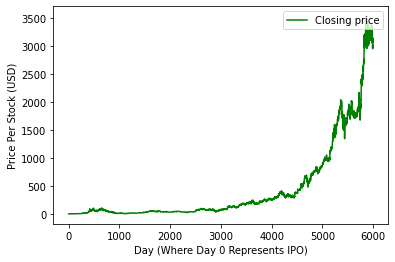

In [ ]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

# PLOTTING ALL INDICATORS IN ONE PLOT
#plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
#plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.xlabel('Day (Where Day 0 Represents IPO)')
plt.ylabel('Price Per Stock (USD)')
plt.show()

In [ ]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [ ]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [ ]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') 
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
141/141 - 4s - loss: 7.5450e-04
Epoch 2/50
141/141 - 0s - loss: 9.1602e-05
Epoch 3/50
141/141 - 0s - loss: 6.4509e-07
Epoch 4/50
141/141 - 0s - loss: 6.6722e-07
Epoch 5/50
141/141 - 0s - loss: 6.6606e-07
Epoch 6/50
141/141 - 0s - loss: 7.0272e-07
Epoch 7/50
141/141 - 0s - loss: 6.6165e-07
Epoch 8/50
141/141 - 0s - loss: 6.5808e-07
Epoch 9/50
141/141 - 0s - loss: 6.7178e-07
Epoch 10/50
141/141 - 0s - loss: 6.8080e-07
Epoch 11/50
141/141 - 0s - loss: 8.2352e-07
Epoch 12/50
141/141 - 0s - loss: 7.3677e-07
Epoch 13/50
141/141 - 0s - loss: 7.4182e-07
Epoch 14/50
141/141 - 0s - loss: 8.0153e-07
Epoch 15/50
141/141 - 0s - loss: 7.7955e-07
Epoch 16/50
141/141 - 0s - loss: 7.8624e-07
Epoch 17/50
141/141 - 0s - loss: 7.1262e-07
Epoch 18/50
141/141 - 0s - loss: 7.6800e-07
Epoch 19/50
141/141 - 0s - loss: 7.1604e-07
Epoch 20/50
141/141 - 0s - loss: 8.8269e-07
Epoch 21/50
141/141 - 0s - loss: 7.2688e-07
Epoch 22/50
141/141 - 0s - loss: 7.4787e-07
Epoch 23/50
141/141 - 0s - loss: 8.0501e-

In [ ]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


Train RMSE: 3.33
Test RMSE: 111.28


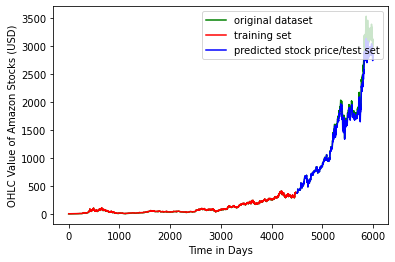

Last Day Value: [2808.2083]
Next Day Value: [[2492.8113]]


In [ ]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Amazon Stocks (USD)')
plt.show()

# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", (last_val))
print("Next Day Value:", (last_val*next_val))
#print "Last Day Value:".format(card)
#print "Next Day Value:".format(card)

# print np.append(last_val, next_val)